**Instituto Tecnol√≥gico de Aeron√°utica ‚Äì ITA**

**Intelig√™ncia Artificial para Rob√≥tica M√≥vel ‚Äì CT-213**

**Professores:**

Marcos Ricardo Omena de Albuquerque Maximo

Andr√© Oliveira Fran√ßani


# Laborat√≥rio 8 ‚Äì Redes Neurais Convolucionais

# 1. Introdu√ß√£o

Nesse laborat√≥rio, seu objetivo √© implementar, treinar e testar a rede neural LeNet-5 usando o dataset MNIST.  O MNIST consiste num conjunto grande de imagens anotadas de d√≠gitos decimais escritos √† m√£o. Assim, voc√™ reproduzir√° um trabalho cl√°ssico da Literatura de Redes Neurais Convolucionais (CNNs), que foi realizado originalmente por Yann LeCun. A Figura 1 apresenta uma das imagens do MNIST juntamente com o *label* esperado (de acordo com a anota√ß√£o) e o *label* predito pela LeNet-5.

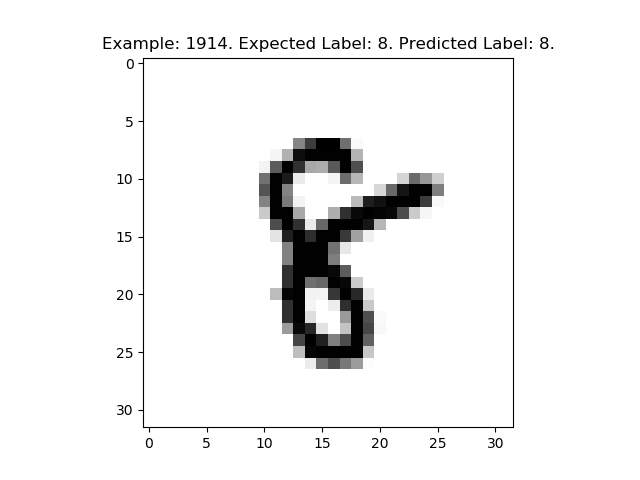

**Figura 1**: exemplo de d√≠gito escrito √† m√£o do *dataset* MNIST.


# 2. Descri√ß√£o do Problema

O problema a ser resolvido nesse laborat√≥rio √© implementar, treinar e testar a rede LeNet-5 no *dataset* MNIST. Para isso, voc√™ deve usar a *framework* Keras com *backend* Tensorflow. A Tabela 1 apresenta uma descri√ß√£o da rede LeNet-5. A entrada da rede √© (32, 32, 1), em que os n√∫meros representam largura, altura e n√∫mero de canais de cor da imagem, respectivamente. Para ajuda em como implementar cada uma dessas camadas usando Keras, recomenda-se verificar a Se√ß√£o 6 (Dicas). Al√©m disso, destaca-se que o aluno pode encontrar algumas interpreta√ß√µes mais modernas da LeNet-5 na Internet, mas pede-se para implementar a arquitetura dessa rede conforme descrito na Tabela 1.


|**Camada**|**Tipo**|**N√∫mero de Filtros**|**Tamanho da Sa√≠da**|**Tamanho do Kernel**|***Stride***|***Activation Function***|
|:------|:----------------|:--|:----|:---|:-|:------|
|Entrada|Imagem           |1  |32x32|-   |- |-      |
|1      |Conv2D           |6  |28x28|5x5 |1 |tanh   |
|2      |AveragePooling2D |6  |14x14|2x2 |2 |-      |
|3      |Conv2D           |16 |10x10|5x5 |1 |tanh   |
|4      |AveragePooling2D |16 |5x5  |2x2 |2 |-      |
|5      |Conv2D           |120|1x1  |5x5 |1 |tanh   |
|6      |*Dense* (FC)     |-  |84   |-   |- |tanh   |
|7      |*Dense* (FC)     |-  |10   |-   |- |softmax|

<p align="center">
<b>Tabela 1</b>: arquitetura da LeNet-5. </p>

# 3. C√≥digo Base

O c√≥digo base fornece diversas implementa√ß√µes para facilitar o uso do NMIST e o treinamento e avalia√ß√£o da LeNet-5. Voc√™ precisa apenas editar a Se√ß√£o 4.3, onde deve ser implementada a LeNet-5.


# 4. Tarefas

Comece o laborat√≥rio executando a c√©lula abaixo com algumas fun√ß√µes auxiliares. As fun√ß√µes s√£o utilizadas para ler a base de dados MNIST, visualizar uma imagem, salvar o modelo treinado e carregar um modelo j√° treinado. **N√£o h√° necessidade de alter√°-las**.

In [19]:
import gzip
import numpy as np
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt


def read_mnist(images_path, labels_path):
    with gzip.open(labels_path, 'rb') as labelsFile:
        labels = np.frombuffer(labelsFile.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imagesFile:
        length = len(labels)
        # Load flat 28x28 px images (784 px), and convert them to 28x28 px
        features = np.frombuffer(imagesFile.read(), dtype=np.uint8, offset=16) \
            .reshape(length, 784) \
            .reshape(length, 28, 28, 1)

    # Pad images with 0s
    features = np.pad(features, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

    return features, labels


def display_image(image, title):
    image = image.squeeze()
    plt.figure()
    plt.title(title)
    plt.imshow(image, cmap=plt.cm.gray_r)


def save_model_to_json(model, model_name):
    # serialize model to JSON
    model_json = model.to_json()
    with open(model_name + '.json', 'w') as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights(f'{model_name}.weights.h5')


def load_model_from_json(model_name):
    json_file = open(model_name + '.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(f'{model_name}.weights.h5')
    return loaded_model

## 4.1.	*Download* do NMIST

Execute a c√©lula abaixo para fazer o *download* do MNIST. 4 arquivos devem ser baixados:

- train-images-idx3-ubyte.gz:  *training set images* (9912422 *bytes*).
- train-labels-idx1-ubyte.gz:  *training set labels* (28881 *bytes*).
- t10k-images-idx3-ubyte.gz:   *test set images* (1648877 *bytes*).
- t10k-labels-idx1-ubyte.gz:   *test set labels* (4542 *bytes*).


In [1]:
!gdown 1KChLOaAQ3mir1y6GllWepKHQ37TPtyGN
!gdown 16uGY7aSmUISTnGRsfgnCMr49fPblpZ_R
!gdown 1dbejZp5yA0vxNEPZqEXFnW2M3Maiktvk
!gdown 1-gO8pKMDGTlVJ0pl0BUosiZXTEUKQdR8

Downloading...
From: https://drive.google.com/uc?id=1KChLOaAQ3mir1y6GllWepKHQ37TPtyGN
To: c:\Users\dougl\matrix\ct-213\lab8 - Convolucional Neural Networks\t10k-images-idx3-ubyte.gz

  0%|          | 0.00/1.65M [00:00<?, ?B/s]
 32%|‚ñà‚ñà‚ñà‚ñè      | 524k/1.65M [00:00<00:00, 2.55MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 6.02MB/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.65M/1.65M [00:00<00:00, 5.31MB/s]
Downloading...
From: https://drive.google.com/uc?id=16uGY7aSmUISTnGRsfgnCMr49fPblpZ_R
To: c:\Users\dougl\matrix\ct-213\lab8 - Convolucional Neural Networks\t10k-labels-idx1-ubyte.gz

  0%|          | 0.00/4.54k [00:00<?, ?B/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.54k/4.54k [00:00<?, ?B/s]
Downloading...
From (original): https://drive.google.com/uc?id=1dbejZp5yA0vxNEPZqEXFnW2M3Maiktvk
From (redirected): https://drive.google.com/uc?id=1dbejZp5yA0vxNEPZqEXFnW2M3Maiktvk&confirm=t&uuid=2e65bd75-6129-4793-b351-34974a2dfedd
To: c:\Users\dougl\matrix\ct-213\lab8 - Co

## 4.2.	Explora√ß√£o do NMIST

Execute o a c√©lula abaixo para explorar o NMIST. Alguns dados sobre o *training* e *test sets* ser√£o mostradas. Al√©m disso, s√£o mostradas algumas imagens aleat√≥rias. **N√£o h√° necessidade de incluir essas imagens no seu relat√≥rio**.


# of training images: 60000
# of test images: 10000


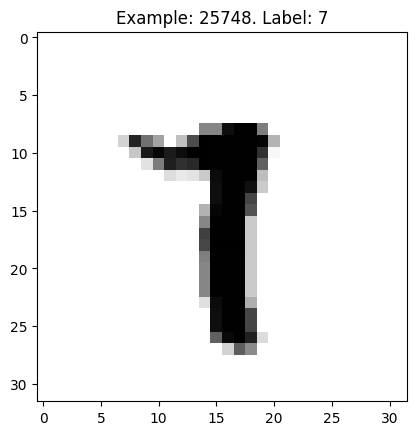

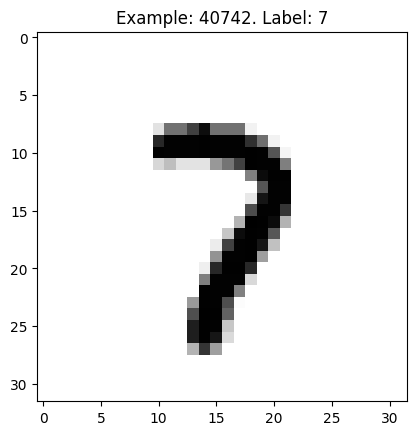

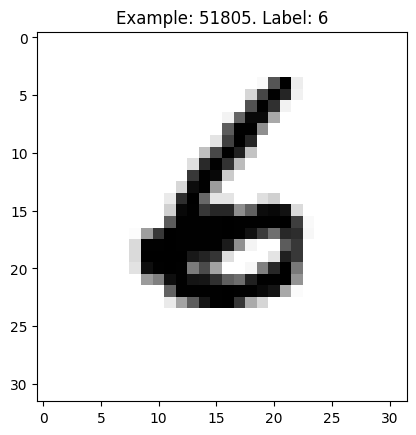

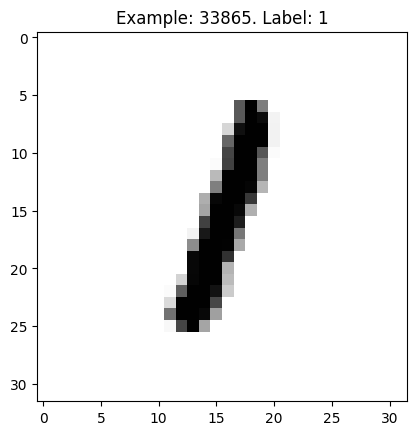

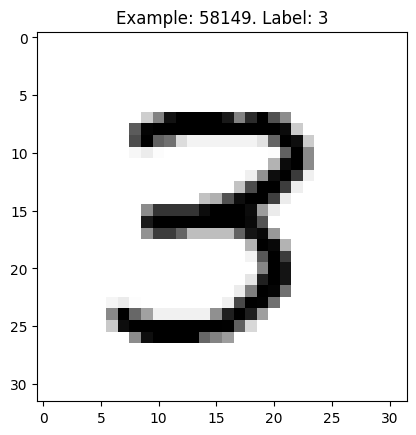

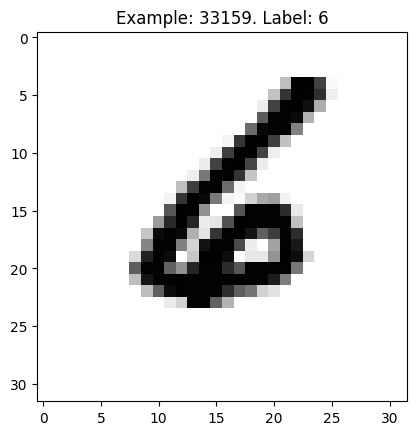

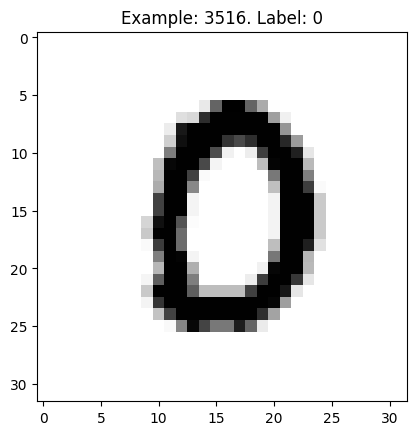

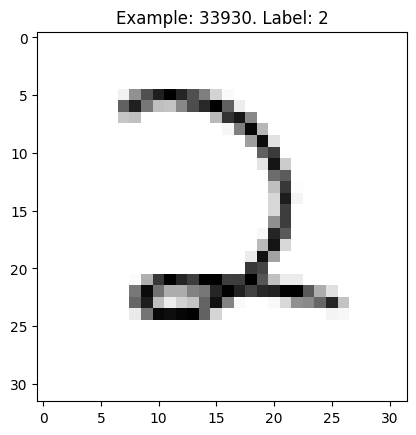

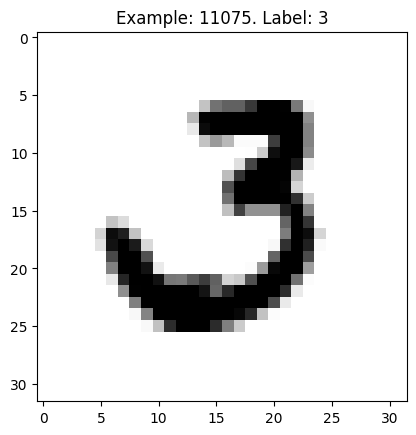

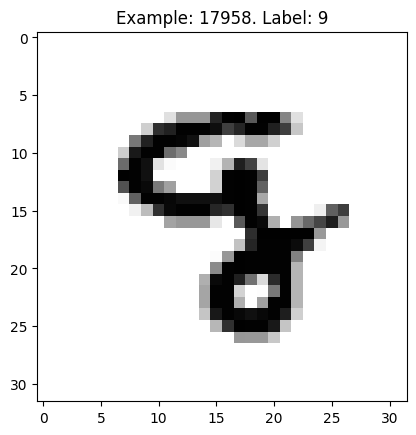

In [4]:
import random
import matplotlib.pyplot as plt


NUM_IMAGES = 10

train_features, train_labels = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')
test_features, test_labels = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

print('# of training images:', train_features.shape[0])
print('# of test images:', test_features.shape[0])

for i in range(NUM_IMAGES):
    index = random.randint(0, train_features.shape[0])
    display_image(train_features[index], 'Example: %d. Label: %d' % (index, train_labels[index]))

plt.show()

## 4.3. Implementa√ß√£o da LeNet-5

Usando Keras, implemente a arquitetura LeNet-5 de acordo com a arquitetura apresentada na Tabela 1. H√° dicas na Se√ß√£o 6 para te ajudar. **Observa√ß√µes**:

- N√£o h√° necessidade de se preocupar com regulariza√ß√£o ou normaliza√ß√£o para o correto treinamento da rede.

- A implementa√ß√£o da LeNet-5 √© muito simples usando Keras. Ser√£o poucas linhas de c√≥digo.

- Como essa √© uma rede muito cl√°ssica, h√° diversos lugares na *Internet* com implementa√ß√µes dela. Por√©m, recomendo que voc√™ tente implementar voc√™ mesmo a rede ao inv√©s de procurar c√≥digo j√° pronto. Al√©m disso, perceba que a rede deve ser implementada exatamente conforme mostrado na Tabela 1.


In [9]:
from tensorflow.keras import layers, activations
from tensorflow.keras.models import Sequential


def make_lenet5():
    model = Sequential()

    model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), activation='tanh',  input_shape=(32, 32, 1)))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(layers.Conv2D(filters=120, kernel_size=(5, 5), strides=(1,1), activation='tanh'))

    model.add(layers.Flatten())
    model.add(layers.Dense(units=84, activation='tanh'))
    model.add(layers.Dense(units=10, activation='softmax'))

    return model

## 4.4. Treinamento da LeNet-5

Treine a LeNet-5 implementada. Leia o c√≥digo fornecido e tente entender o que est√° sendo feito. Perceba que a implementa√ß√£o separa o *training set* original, deixando algumas imagens para um *(cross-)validation set*.

Para verificar o treinamento da rede, voc√™ deve executar o Tensorboard **antes de iniciar o treinamento**. Em seguida, execute a c√©lula de treinamento da rede, atualize a interface do TensorBoard clicando na setinha no canto superior direito (üîÅ). Para visualizar os novos pontos salvos no *log* do treinamento, v√° atualizando a interface ao fim de cada *epoch*.  

Coloque imagens do Tensorboard mostrando a evolu√ß√£o do treinamento no seu relat√≥rio (pode tirar *print screen* dos gr√°ficos do Tensorboard). Discuta os resultados obtidos.


In [12]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12584), started 0:00:26 ago. (Use '!kill 12584' to kill it.)

### Treinamento da LeNet-5


In [17]:
import os
from time import time

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard


# Comment this line to enable training using your GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

EPOCHS = 10
BATCH_SIZE = 128

# Load and split data
train_features, train_labels = read_mnist('train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz')

train_features, validation_features, train_labels, validation_labels = \
    train_test_split(train_features, train_labels, test_size=0.2, random_state=0)

print('# of training images:', train_features.shape[0])
print('# of cross-validation images:', validation_features.shape[0])

# Pre-processing data and build generator
X_train, y_train = train_features, to_categorical(train_labels)
X_validation, y_validation = validation_features, to_categorical(validation_labels)

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

# Build and compile model
model = make_lenet5()
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

steps_per_epoch = X_train.shape[0] // BATCH_SIZE
validation_steps = X_validation.shape[0] // BATCH_SIZE

# Start training
tensorboard = TensorBoard(log_dir=os.path.join("logs", "{}".format(time())))
model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,
          validation_data=validation_generator, validation_steps=validation_steps,
          shuffle=True, callbacks=[tensorboard])

save_model_to_json(model, 'lenet5')

# of training images: 48000
# of cross-validation images: 12000


c:\Users\dougl\anaconda3\envs\ct213\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_6 (Conv2D)               ‚îÇ (None, 28, 28, 6)      ‚îÇ           156 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling2d_4             ‚îÇ (None, 14, 14, 6)      ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling2D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_7 (Conv2D)               ‚îÇ (None, 10, 10, 16)     ‚îÇ         2,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling2d_5             ‚îÇ (None, 5, 5, 16)       ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling2D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_8 (Conv2D)               ‚îÇ (None, 1, 1, 120)      ‚îÇ        48,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_2 (Flatten)             ‚îÇ (None, 120)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 84)             ‚îÇ        10,164 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 10)             ‚îÇ           850 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


c:\Users\dougl\anaconda3\envs\ct213\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 7ms/step - accuracy: 0.8681 - loss: 0.4923 - val_accuracy: 0.9745 - val_loss: 0.0831
Epoch 2/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.9767 - loss: 0.0753 - val_accuracy: 0.9812 - val_loss: 0.0604
Epoch 3/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step - accuracy: 0.9831 - loss: 0.0534 - val_accuracy: 0.9828 - val_loss: 0.0557
Epoch 4/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 7ms/step - accuracy: 0.9862 - loss: 0.0458 - val_accuracy: 0.9850 - val_loss: 0.0489
Epoch 5/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.9900 - loss: 0.0352 - val_accuracy: 0.9845 - val_loss: 0.0501
Epoch 6/10
375/375 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.9898 - loss: 0.0311 - val_accuracy: 0.9866 - val_loss: 0.0439
Epo

## 4.5. Avalia√ß√£o da LeNet-5

Avalie a LeNet-5 no *test set* executando a c√©lula abaixo. Al√©m de exibir alguns exemplos aleat√≥rios, incluindo o *label* anotado e o *label* predito pela LeNet-5, a implementa√ß√£o mostra alguns exemplos em que a rede errou a classifica√ß√£o. Inclua pelo menos um gr√°fico em que a predi√ß√£o da rede funcionou e outro em que ela errou a classifica√ß√£o no seu relat√≥rio. Comente os resultados obtidos.


Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_6 (Conv2D)               ‚îÇ (None, 28, 28, 6)      ‚îÇ           156 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling2d_4             ‚îÇ (None, 14, 14, 6)      ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling2D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_7 (Conv2D)               ‚îÇ (None, 10, 10, 16)     ‚îÇ         2,416 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ average_pooling2d_5             ‚îÇ (None, 5, 5, 16)       ‚îÇ             0 ‚îÇ
‚îÇ (AveragePooling2D)              ‚îÇ                        ‚îÇ               ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_8 (Conv2D)               ‚îÇ (None, 1, 1, 120)      ‚îÇ        48,120 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_2 (Flatten)             ‚îÇ (None, 120)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_4 (Dense)                 ‚îÇ (None, 84)             ‚îÇ        10,164 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 10)             ‚îÇ           850 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 185,120 (723.13 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 123,414 (482.09 KB)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 3ms/step - accuracy: 0.9844 - loss: 0.0489
Test loss: 0.037729665637016296
Test accuracy: 0.9889000058174133


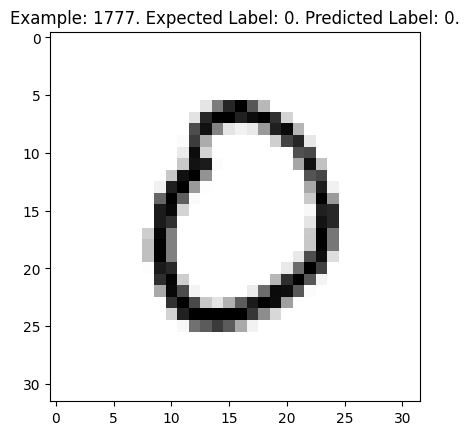

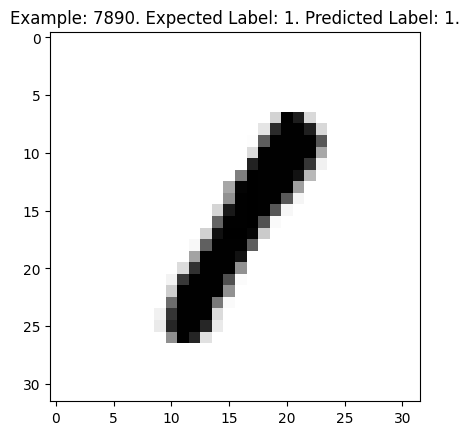

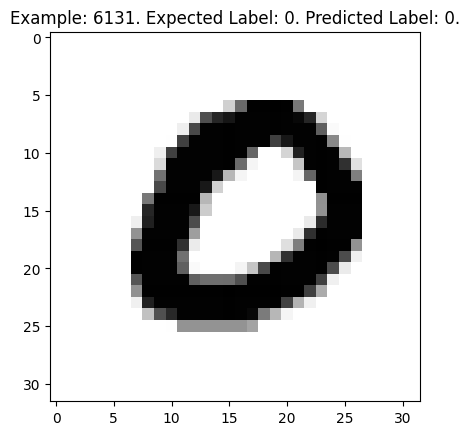

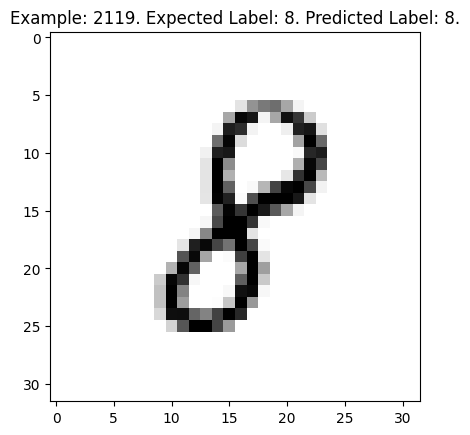

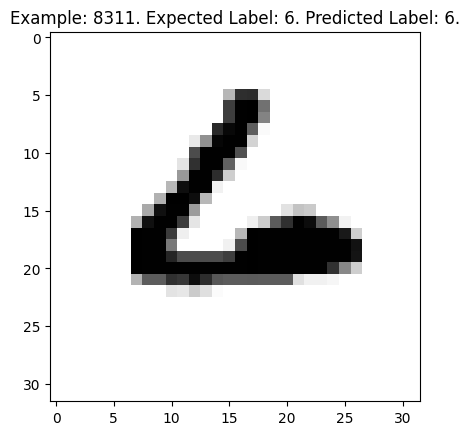

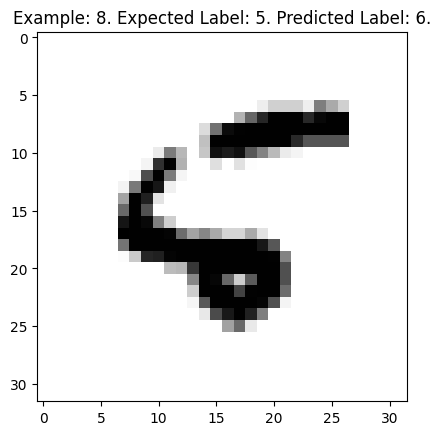

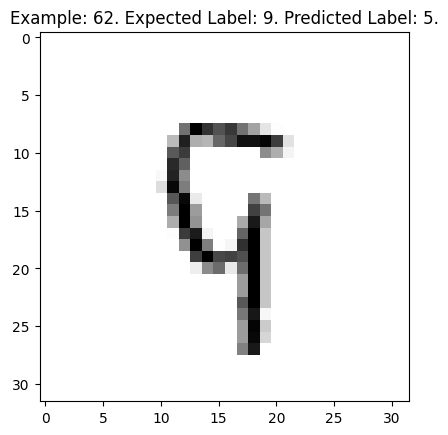

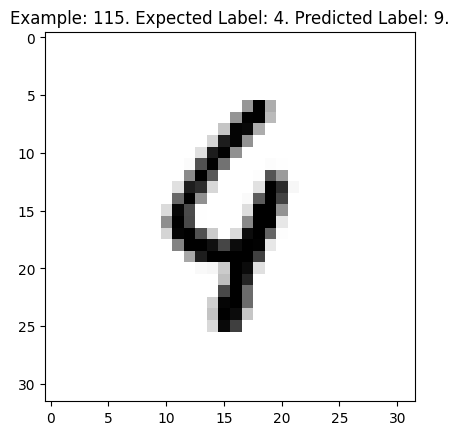

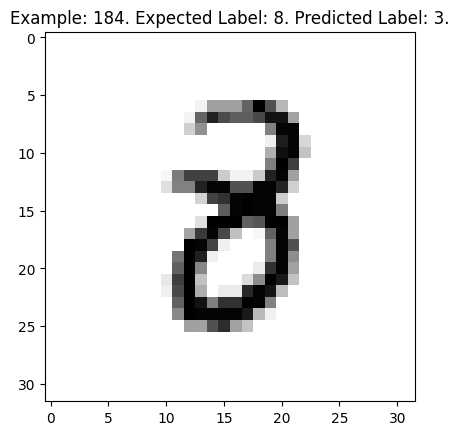

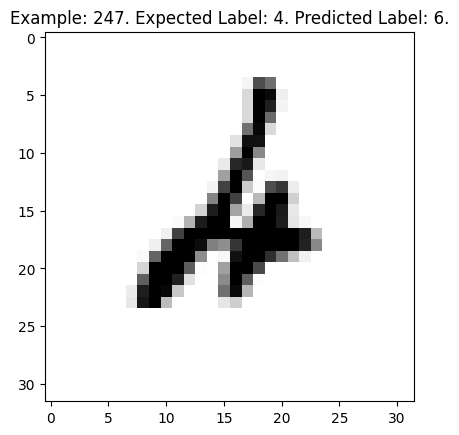

In [20]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential


# make results folder to save images
if not os.path.exists('results'):
  os.makedirs('results')

NUM_IMAGES_RANDOM = 5
NUM_IMAGES_MISCLASSIFICATION = 5

test_features, test_labels = read_mnist('t10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz')

model = load_model_from_json('lenet5')
model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

predicted_labels = model.predict(test_features)
score = model.evaluate(test_features, to_categorical(test_labels))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

for i in range(NUM_IMAGES_RANDOM):
    index = random.randint(0, test_features.shape[0])
    display_image(test_features[index],
                  'Example: %d. Expected Label: %d. Predicted Label: %d.' %
                  (index, test_labels[index], np.argmax(predicted_labels[index, :])))
    plt.savefig('results/test_image_%d.png' % index, format='png')


count = 0
for i in range(test_features.shape[0]):
    if count == NUM_IMAGES_MISCLASSIFICATION:
        break
    if np.argmax(predicted_labels[i, :]) != test_labels[i]:
        display_image(test_features[i],
                      'Example: %d. Expected Label: %d. Predicted Label: %d.' %
                      (i, test_labels[i], np.argmax(predicted_labels[i, :])))
        plt.savefig('results/misclassified_image_%d.png' % i, format='png')
        count += 1

plt.show()

# 5. Entrega

A entrega consiste do notebook no formato **.ipynb** e de um relat√≥rio, submetida atrav√©s do Google Classroom. Modifica√ß√µes nos arquivos do c√≥digo base s√£o permitidas, desde que o nome e a interface dos scripts ‚Äúmain‚Äù n√£o sejam alterados. A princ√≠pio, n√£o h√° limita√ß√£o de n√∫mero de p√°ginas para o relat√≥rio, mas pede-se que seja sucinto. O relat√≥rio deve conter:

- Breve descri√ß√£o em alto n√≠vel da sua implementa√ß√£o.
- Figuras que comprovem o funcionamento do seu c√≥digo.

Por limita√ß√µes do Google Classroom (e por motivo de facilitar a automatiza√ß√£o da corre√ß√£o), entregue seu laborat√≥rio com todos os arquivos num √∫nico arquivo **.zip** (**n√£o** utilize outras tecnologias de compacta√ß√£o de arquivos) com o seguinte padr√£o de nome: **‚Äú<login_email_google_education>_labX.zip‚Äù**. Por exemplo, no meu caso, meu login Google Education √© **marcos.maximo**, logo eu entregaria o lab 8 como **‚Äúmarcos.maximo_lab8.zip‚Äù**. **N√£o** crie subpastas para os arquivos da sua entrega, **deixe todos os arquivos na ‚Äúraiz‚Äù do .zip**. Os relat√≥rios devem ser entregues em formato **.pdf**.

# 6. Dicas

- Para criar uma camada de convolu√ß√£o 2D no Keras, fa√ßa:
```python
model.add(layers.Conv2D(filters=nf, kernel_size=(fx, fy), strides=(sx, sy), activation=activations.fun))
```
em que nf, fx, fy, sx, sy e fun configuram a camada.

- Para a primeira camada, tamb√©m √© importante definir o formato da entrada como um tensor de (32, 32, 1) (imagem de 32x32 e 1 canal de cor):
```python
model.add(layers.Conv2D(filters=nf, kernel_size=(fx, fy), strides=(sx, sy), activation=activations.fun, input_shape=(32, 32, 1)))
```

- Para criar uma camada de *average pooling* no Keras, fa√ßa:
```python
model.add(layers.AveragePooling2D(pool_size=(px, py), strides=(sx, sy)))
```
em que px, py, sx e sy configuram a camada.

- Para definir a camada de transi√ß√£o entre as camadas convolucionais e as densas (completamente conectadas), a qual √© a camada 5 na LeNet-5, fa√ßa o seguinte:
```python
model.add(layers.Flatten())
model.add(layers.Dense(units=num_neurons, activation=activations.fun))
```

- Para fazer o download das figuras e us√°-las no relat√≥rio, use os seguintes comandos:
```python
from google.colab import files
import os
os.system('zip -r lab8_results.zip results')
files.download("lab8_results.zip")
```

- Voc√™ pode tamb√©m fazer o download dos logs, do modelo lenet5.json e dos pesos lenet5.h5 se quiser guard√°-los.